In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler,normalize
import warnings

warnings.filterwarnings('ignore')


## Part 1. K-means Clustering Analysis

### <span style="color:red">=========== Assignment 1 ===========</span>

Use mu_a as the initial mean point: 
Use mu_b as the initial mean point: 
Use mu_c as the initial mean point: 


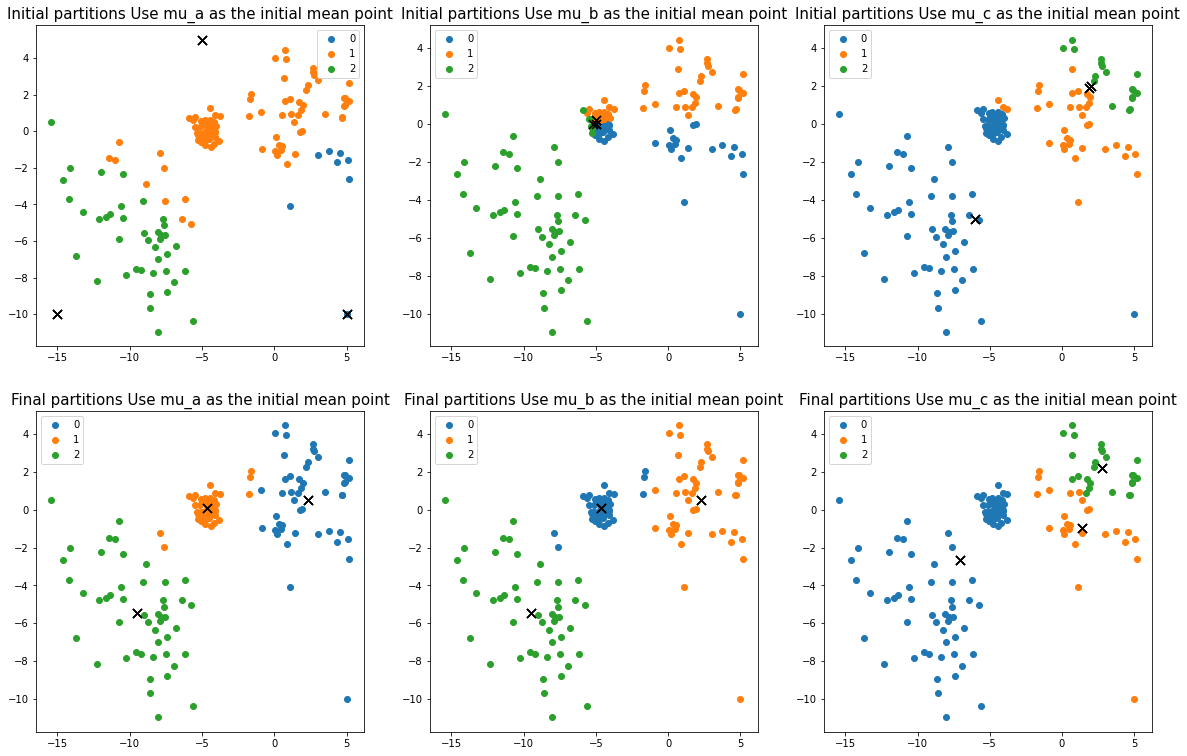

In [2]:
########################### K-means Clustering Analysis #######################################
# Assignment 1:
# ===

X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) # The given initial mean points of (a) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) # The given initial mean points of (b) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) # The given initial mean points of (c) 

def partition(X, mu):
    """
    Helper function that performs a partition given the mean points using Euclidean distance
    Each input is numpy array:
        - X: (N,d) or (N,C,d), data points
        - mu: (C x d), the mean points
    
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    N = X.shape[0] # number of objects
    C = mu.shape[0] # number of clusters
    ###
    #   You code here
    ###
    #tile x (N,d) to (N,C,D)
    if len(np.shape(X)) == 2:
        x_CND = np.tile(X,[C,1,1])#(N,d) -> (C,N,d)
        x_NCD = np.transpose(x_CND, axes = [1,0,2])  #(C,N,d)->(N,C,d)
    distance_NC = np.sum((x_NCD - mu)**2,axis = 2)   #Calculate Euclidean distance
    argmin_distance_N = np.argmin(distance_NC,axis = 1)
    distance_N = np.sqrt(np.min(distance_NC,axis = 1))
    partition = argmin_distance_N
    ###
    #   End of Your code
    ###
    return partition

############################
# a) Implement a display function, where different clusters must be marked in different colours

def visualize_kmeans_res(mu,X,lb,title = ''):
    #####
    #   Your code here
    # ===
    #Set title for plot
    ax.set_title(str(title),fontsize=15)
    #Set the color list
    colors=list(mcolors.TABLEAU_COLORS.keys())
    #Plot the scatter
    for i in range(len(np.unique(lb))):
        ax.scatter(X[lb==i, 0], X[lb==i, 1]
                ,marker='o' #shape
                ,c=mcolors.TABLEAU_COLORS[colors[i]]
                ,label = i
               )
    #Plot the centroid
        ax.scatter(mu[:,0],mu[:,1]
                   ,marker="x"
                   ,s=80
                   ,c="black")
    plt.legend()

    return
    
    ###
    #   End of your code
    ###

    
#############################
# b) Display the final partitions where the initial and final mean points
#
#   Your code here
# ===
fig = plt.figure(figsize=(20,13))
# Use mu_a as the initial mean point 
print("Use mu_a as the initial mean point: ")
ax=plt.subplot(231)
lb_a_initial=partition(X,mu_a)
visualize_kmeans_res(mu_a,X,lb_a_initial,'Initial partitions Use mu_a as the initial mean point')


# Use mu_b as the initial mean point 
print("Use mu_b as the initial mean point: ")
ax=plt.subplot(232)
lb_b_initial=partition(X,mu_b)
visualize_kmeans_res(mu_b,X,lb_b_initial,'Initial partitions Use mu_b as the initial mean point')


# Use mu_c as the initial mean point 
print("Use mu_c as the initial mean point: ")
ax=plt.subplot(233)
lb_c_initial=partition(X,mu_c)
visualize_kmeans_res(mu_c,X,lb_c_initial,'Initial partitions Use mu_c as the initial mean point')

#Final partitions Use mu_a as the initial mean point
ax=plt.subplot(234)
cluster1 = KMeans(n_clusters=mu_a.shape[0],init=mu_a,n_init=1).fit(X)
centroid_a = cluster1.cluster_centers_
lb_a_final=partition(X,centroid_a)
visualize_kmeans_res(centroid_a,X,lb_a_final,'Final partitions Use mu_a as the initial mean point')

#Final partitions Use mu_b as the initial mean point
ax=plt.subplot(235)
cluster2 = KMeans(n_clusters=mu_b.shape[0],init=mu_b,n_init=1).fit(X)
centroid_b = cluster2.cluster_centers_
lb_b_final=partition(X,centroid_b)
visualize_kmeans_res(centroid_b,X,lb_b_final,'Final partitions Use mu_b as the initial mean point')

#Final partitions Use mu_c as the initial mean point
ax=plt.subplot(236)
cluster3 = KMeans(n_clusters=mu_c.shape[0],init=mu_c,n_init=1).fit(X)
centroid_c = cluster3.cluster_centers_
lb_c_final=partition(X,centroid_c)
visualize_kmeans_res(centroid_c,X,lb_c_final,'Final partitions Use mu_c as the initial mean point')


plt.show()




### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [3]:
##########################
# Assignment 2 
#
# K-means algorithm cannot be used until the hyperparameter K (the
# number of clusters) is set up so the
# clustering result is better. We use f_ratio from the lecture
# to do so.
# ===


################
# (a) Implement the scatter-based F-ratio index in Python 
#   where Euclidean distance is used

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 
    k = len(np.unique(lb))
    _,d = np.shape(X)
    n = np.zeros(k)
    c = np.zeros([k,d])
    ###
    # Your code here
    ###
    #Calculate the centroid of each cluster using Euclidean distance
    c = np.array([np.mean(X[lb==i],axis=0) for i in range(k)])
    #Claculate the numbers of points in each cluster
    n = np.array([np.sum(lb==i) for i in range(k)])
    #Calculate the centroid of whole data points using Euclidean distance
    c_m = np.array([np.mean(c,axis=0)])
    
    #Calculate the SSW(within-cluster-scatter)
    ssw = np.sum(np.array([np.sum(np.sum(np.square(X[lb==i]-c[i,:]),axis=1)) for i in range(k)]))
    #Calculate the SSB(between-cluster-scatter)
    ssb = np.sum(np.array(n)*np.array(np.sum(np.square(c-c_m),axis=1)))
    #Calculate the F-ratio index
    f_ratio = (k * ssw)/ssb

    ###
    # End of your code
    ###
    return f_ratio


warnings.filterwarnings('ignore')
np.random.seed(0)
################
# (b) For K = 2, 3, · · · , 10, run the the K-means each with 3 different random initialisation
#  on the 'kmeans_data_2.npy' dataset and plot F-ratio index versus K
#
# Your code here:
# ===
X = np.load('./Data/kmeans_data_2.npy')
#Three random initialisation F-ratio list
list_ratio=[[]for i in range(3)]

#Cycle 3 times random initialisation
for i in range(3): 
    #K=2,3...10 run Kmeans built-in function
    for n_clusters in range(2, 11):
        #Pick n points at random in the range of all points
        init_inter = np.random.randint(-897,1004, size = (n_clusters, 2))
        init_center = init_inter/100
        
        #Use bulit-in Function to calculate the partation
        cluster_ass2 = KMeans(n_clusters=n_clusters, init=init_center, n_init=1).fit(X)
        #Get the centroid of cluster
        centroid_ass2 = cluster_ass2.cluster_centers_
        #Calculate the label of each point
        lb_ass2 = partition(X,centroid_ass2)
        #calculate the F-ratio of data
        f_ratio = f_ratio_euclidean(X,lb_ass2)
        #Put the ratio in the list
        list_ratio[i].append(f_ratio)


#Use only the smallest F-ratio index value measured on 3 partitions caused by different initialisation
F_ratiolist = np.min(list_ratio,axis=0)
print(f"The smallest F-ratio list (K=2,3...10 ) :\n{np.min(list_ratio,axis=0)}")

#Get the index of smallest F-ratio
max_index = np.argmin(F_ratiolist)+2
print(f"\nOptimal number of clusters with F-ratio index: {max_index}")


The smallest F-ratio list (K=2,3...10 ) :
[1.54385872 0.87719176 0.71124538 0.32670029 0.34339802 0.35010197
 0.35700071 0.3309855  0.3726017 ]

Optimal number of clusters with F-ratio index: 5


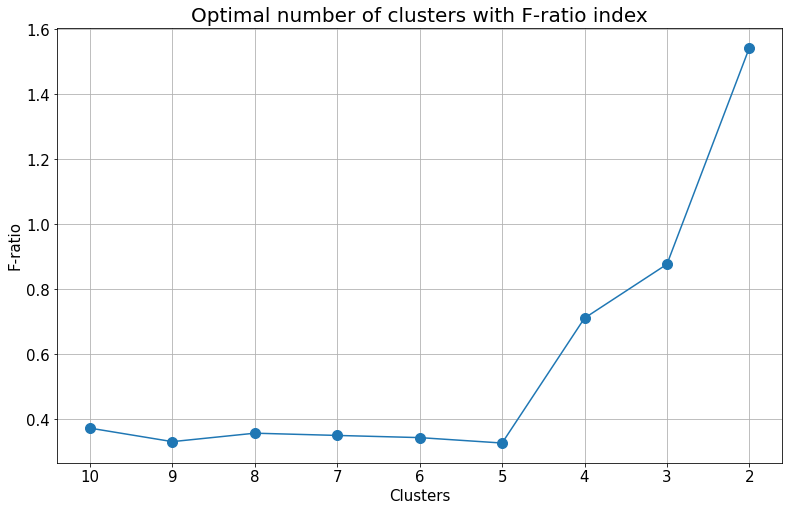

In [4]:
fig = plt.figure(figsize=(13,8))
x= np.linspace(2,10,9)

plt.title("Optimal number of clusters with F-ratio index",fontsize=20)
plt.xlabel("Clusters",fontsize=15)
plt.ylabel("F-ratio",fontsize=15)
plt.xticks(x,fontsize=15)
plt.yticks(fontsize=15)

#Plot the F-ratio line chart
plt.plot(x, F_ratiolist ,marker="o",markersize=10)
plt.grid()
plt.gca().invert_xaxis()
plt.show()

## The optimal number of clusters ： 5

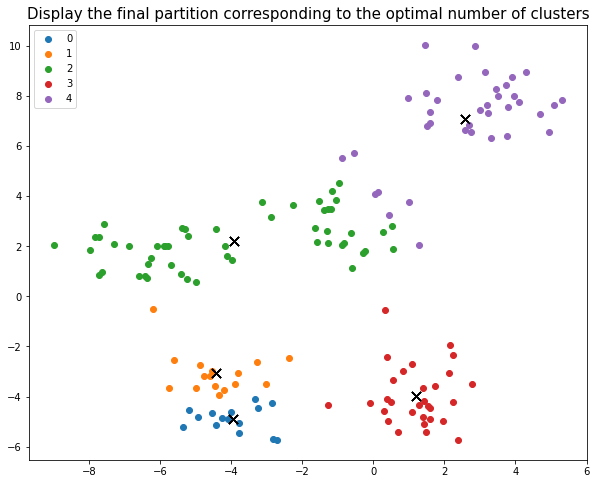

In [5]:
warnings.filterwarnings('default')
################
# (c) Display the final partition with optimal number of clusters
#
# Your code here:
# ===
fig = plt.figure(figsize=(10,8))
# Calculate the random initial mean points 
init_inter = np.random.randint(-897,1004, size = (5, 2))
init_center = init_inter/100
#Use the kmeans bulit-in function
cluster_Optimal = KMeans(n_clusters=5, init=init_center, n_init=1).fit(X)
#Get the centroid of Cluster
centroid_Optimal = cluster_Optimal.cluster_centers_
#Get the label of date
lb_Optimal = partition(X,centroid_Optimal)

ax=plt.subplot(111)
#Visualize the result
visualize_kmeans_res(centroid_Optimal, X, lb_Optimal
                     ,'Display the final partition corresponding to the optimal number of clusters' )

plt.show()

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Spectral Clustering Analysis

### <span style="color:red">=========== Assignment 3 ===========</span>

Text(0.5, 1.0, 'datapoint and clustering result')

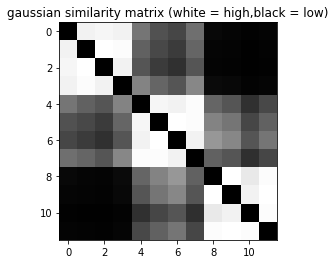

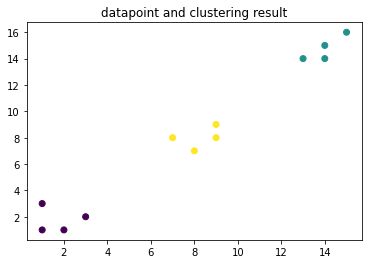

In [6]:
########################### Spectral Clustering Analysis ######################################
# Assignment 3:
#
# Here you are to implement the asymmetric normalised spectral clustering algorithm.
#
# Hint: To implement the asymmetric_SC function, you can
#       use the built-in function, np.linalg.eig, in the numpy library for eigen analysis,
#       and, pairwise_distances, in sklearn.metrics for compute parewise distance, and the
#       sklearn built-in function, cluster.KMeans.
# ===

from sklearn.metrics import pairwise_distances
warnings.filterwarnings('ignore')

def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    
    ###
    # Hint: The RBF kernel definition can be found in the lecture notes.
    n = len(X)
    w = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            #The diagonal of the matrix is 0
            if i != j:
                #distance of different point(Fully connected)
                d = np.sum(np.square(X[i]-X[j]))
                #The RBF kernel
                w[i][j]= np.exp(-0.5 * d/np.power(delta, 2))

    return w
    

def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagnal matrix, which is simple to compute.
    # PS: There is no unreal eigen value here, but sometimes numerical precision problems happen
    #
    # First do eigen analysis. 
    #
    # Your code here :
    ###
    #Get the length of weight matrix 
    n = len(W)
    #Initial the degree matrix
    degree_matrix= np.zeros((n,n))
    #Calculate the degree matrix through Weight matrix
    for i in range(n):
        degree_matrix[i][i]=np.sum(W,axis=1)[i]
    degree_matrix = np.mat(degree_matrix)
    
    # Unnormalised Laplacian matrix
    laplacian_matrix = degree_matrix - W
    # Asymmetric Normalised Laplacian matrix (D^-1* L)
    asy_laplacian_matrix = np.dot(degree_matrix.I,laplacian_matrix)

    #Eigen analysis
    eigVals, eigVects = np.linalg.eig(asy_laplacian_matrix)
    #Get the index of the eigen values
    idx = eigVals.argsort()
    #Sort the eigen values
    eigVals = eigVals[idx]
    #Sort the eigen vectors with the index of eigen values
    eigVects = eigVects[:,idx]
    
    #Get the e and v
    e = eigVals[:k]
    v = np.array(eigVects[:,:k])
    
    #Use Kmeans built-in function
    cluster_ = KMeans(n_clusters=k, random_state=0).fit(v)
    centroid = cluster_.cluster_centers_
    #Get the label using partition function
    lb = partition(v,centroid)

    
    ###
    # End of your code
    ###
    return lb,e,v


####### 
# Now test your implementation with toy data and provided hyper parameters.
# You should see a graph showing a clear block matrix, and a reasonable clustering result
# PS: this is just for testing. No suggestion of using what parameter
# ==
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])


W = gaussian_similarity(X,delta = pairwise_distances(X).std())
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

lb,e,v = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
# print(e,'\n',v)

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

In [7]:
########################### 
# Assignment 4:
#
# Here you are to apply your implemented gaussian_similarity function to a dataset,
# saved in './Data/SC_data_1.npy'. You need to do:
#   a) find out an appropriate hyperparameter value in the Gaussian kernel
#   b) calculate and report the first non-zero eigen vector of laplacian L
#   c) decide how many clusters are in this data set and display results (you will work on this in the next cell)
#
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# ===
X = np.load('./Data/SC_data_1.npy')
###
# a) & b), You code here:
###
#Initilize the list of max gap in each delta
max_gaplist=[]
# Grid the delta from 0.1 to 9.0
for delta in np.linspace(0.1,9.0,90):
    delta = np.round(delta,1) 
    
    W = gaussian_similarity(X,delta) 
    #Get the length of Weight matrix
    n = len(W)
    #Initial the degree matrix
    degree_matrix= np.zeros((n,n))
    #Calculate the degree matrix through Weight matrix
    for i in range(n):
        degree_matrix[i][i]=np.sum(W,axis=1)[i]
    degree_matrix = np.mat(degree_matrix)

    # Unnormalised Laplacian matrix
    laplacian_matrix = degree_matrix - W

    #eigen analysis of 'L'
    eigVals, eigVects = np.linalg.eig(laplacian_matrix)
    #Get the index of the eigen values
    idx = eigVals.argsort()
    #Sort the eigen values
    eigVals = eigVals[idx]
    #Sort the eigen vectors with the index of eigen values
    eigVects = eigVects[:,idx]

# Calculate the eigen gap
    #Calculate the max of gap in eigen value
    eigengap = []
    #Calculate the eigen value except first    
    for i in np.linspace(2,len(eigVals)-1,len(eigVals)-2):
        i = int(i)
        gap = eigVals[i]-eigVals[i-1]
        eigengap.append(gap)
    # Fetch the biggest eigen gap
    maxgap = np.max(eigengap)
    max_gaplist.append(maxgap)


#Get the delta
delta = np.round(np.argmax(max_gaplist)*0.1+0.1,1)
print(f"Max eigen gaps in different delta (from 0.1 to 9.0) :\n{max_gaplist}")        


Max eigen gaps in different delta (from 0.1 to 9.0) :
[(1.0051291726418032+0j), 0.9428303348073013, 0.629850581173234, 0.49187519640421407, 0.45022181132857586, 0.509977127204637, 0.5651917742563191, 0.5603544169250108, 0.464292360397339, 0.5105457305048029, 0.6373044668006651, 0.7706446415060286, 0.8172755902967959, 0.8234292519739084, 0.9539057042455503, 1.2468789610656845, 1.519719605550187, 1.7806578740128083, 2.0534389618314317, 2.3349703977134455, 2.6214713552247213, 2.9091182867143823, 3.1942852209991015, 3.4737051474151968, 3.744569697717873, 4.004573202307443, 4.2519111477894125, 4.485245464309691, 4.703648751621129, 4.906537340078142, 5.093599723936389, 5.2647221141872045, 5.4199026860581405, 5.559106311122498, 5.681735162160786, 5.781767976988777, 5.833707788168276, 5.855758265294488, 5.863136285513748, 5.858725379536055, 5.844071066946405, 5.820418753571004, 5.788869686994037, 5.75041899202067, 5.705969114569854, 5.656337031169786, 5.602259876710658, 5.544400286084146, 5.48

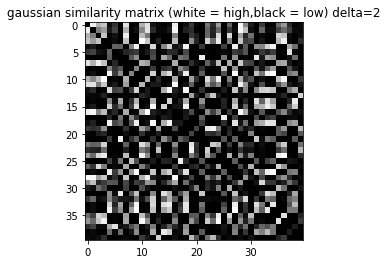

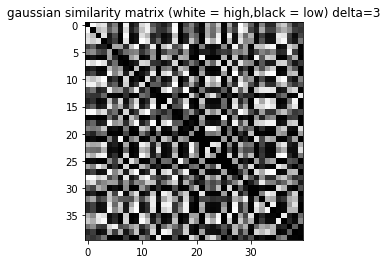

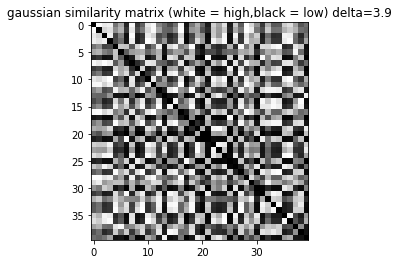

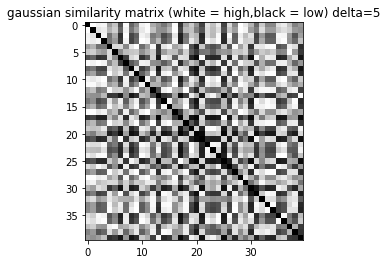

In [8]:
W = gaussian_similarity(X,2)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low) delta=2')
plt.imshow(W,cmap = 'gray')

W = gaussian_similarity(X,3)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low) delta=3')
plt.imshow(W,cmap = 'gray')

W = gaussian_similarity(X,3.9)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low) delta=3.9')
plt.imshow(W,cmap = 'gray')

W = gaussian_similarity(X,5)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low) delta=5')
plt.imshow(W,cmap = 'gray')

In [9]:
# Compute Laplacian matrix
# Delta = 3
W = gaussian_similarity(X,3) 
#Get the length of Weight matrix
n = len(W)
#Initial the degree matrix
degree_matrix= np.zeros((n,n))
#Calculate the degree matrix through Weight matrix
for i in range(n):
    degree_matrix[i][i]=np.sum(W,axis=1)[i]
degree_matrix = np.mat(degree_matrix)

# Unnormalised Laplacian matrix
laplacian_matrix = degree_matrix - W

#eigen analysis of 'L'
eigVals, eigVects = np.linalg.eig(laplacian_matrix)
#Get the index of the eigen values
idx = eigVals.argsort()
#Sort the eigen values
eigVals = eigVals[idx]
#Sort the eigen vectors with the index of eigen values
eigVects = eigVects[:,idx]



###
# End of your code
#
# Fill your result below:
###
print('a) One hyperparameter value for Gaussian kernel:', 3)
print()
print("The first eigenvalue: ", eigVals[0])
print("It can be seen that the first eigenvalue is zero,\nso we should list all the elements of the eigenvector corresponding to the second smallest eigenvalue.\n")

print('b) First non-zero eigen vector:\n', eigVects[:, 1].reshape(4, 10))

a) One hyperparameter value for Gaussian kernel: 3

The first eigenvalue:  0.0
It can be seen that the first eigenvalue is zero,
so we should list all the elements of the eigenvector corresponding to the second smallest eigenvalue.

b) First non-zero eigen vector:
 [[ 0.08618754  0.05962003  0.13412634  0.13060652 -0.13374037 -0.05978801
  -0.20404989  0.11118578 -0.19391663 -0.1498295 ]
 [ 0.1384257   0.08672279 -0.1150906   0.23477295 -0.16453209 -0.13164761
   0.07751742 -0.26189505 -0.12710981  0.17311114]
 [ 0.25107169 -0.22157288  0.14822107  0.17572305  0.14797434 -0.23506163
   0.161645   -0.15413301  0.08211894 -0.01079535]
 [ 0.20659964 -0.18165254 -0.06270527 -0.15406599 -0.15447118  0.16322424
   0.14906091 -0.08440525 -0.14952268  0.23207026]]


The optimal number of k in this data set is: 2

c)  2  clusters, because the eigen gap between 2 and 3 is the biggest. 


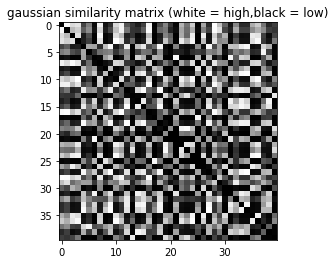

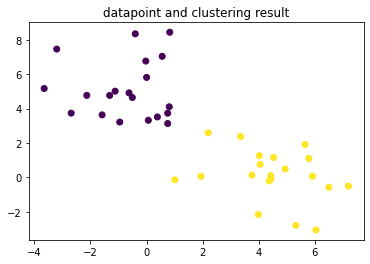

In [10]:
# c) Decide the number of clusters in this data set and display results 
# Your code here:
###

eigengap = []
for i in np.linspace(1,len(eigVals)-1,len(eigVals)-2):
    i = int(i)
    gap = eigVals[i] - eigVals[i-1]
    eigengap.append([i,gap])

eigengap = np.array(eigengap)
# Find the index of the max value in the second column (use [1])
# because the first column is the k value, it does not make sense to find the minimum value
min_idx = eigengap.argmax(axis=0)[1]
# Get the corresponding column index according to the index of the minimum value
# then take out k(The first element) in the list
best_k = int(eigengap[min_idx][0])
print("The optimal number of k in this data set is:",best_k)



W = gaussian_similarity(X,3)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

lb,e,v = asymmetric_SC(W,2)
classes = len(np.unique(lb))

plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
# print(classes)

###
#  End of your code
#
#  Fill your answer below:
###
print('\nc) ', classes, ' clusters, because the eigen gap between 2 and 3 is the biggest. ' )

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

The data2 and data3 distance is small, so the delta scale must be small. Here we set the delta in 2 and 3 to be smaller. So if delta is smaller than 0.1, the clustering result can be good.

Text(0.5, 1.0, 'datapoint and clustering result of SC_data_3')

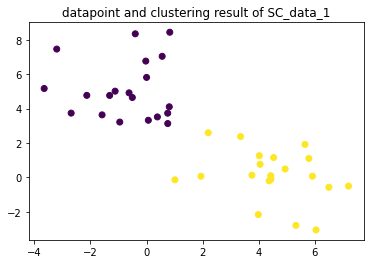

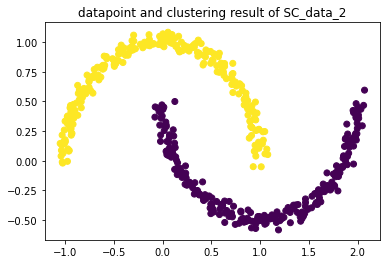

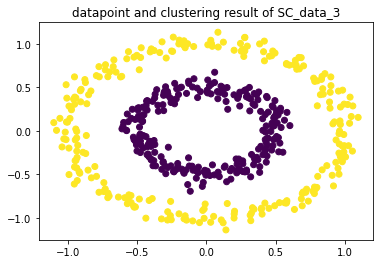

In [11]:
########################### 
# Assignment 5:
#
# Here you are to apply your implemented gaussian_similarity function to 
# more datasets and display results. You need to find proper hyper parameters
# ===
X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')
###
#  Your code here
###
#Get the weight matrix
W1 = gaussian_similarity(X1,2)
#Get the label
lb1,_,_ = asymmetric_SC(W1,2)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c = lb1)
plt.title('datapoint and clustering result of SC_data_1')


# Get the weight matrix
W2 = gaussian_similarity(X2,0.1)
# Get the label
lb2,_,_ = asymmetric_SC(W2,2)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c = lb2)
plt.title('datapoint and clustering result of SC_data_2')


# Get the weight matrix
W3 = gaussian_similarity(X3,0.1)
# Get the label
lb3,_,_ = asymmetric_SC(W3,2)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c = lb3)
plt.title('datapoint and clustering result of SC_data_3')



### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 3. Hierarchical Clustering Analysis

### <span style="color:red">=========== Assignment 6 ===========</span>

dmat [[ 0.          5.66286387  4.96216784 ... 19.1081774  12.45220181
   1.79719429]
 [ 5.66286387  0.         10.09855184 ... 20.69782106  6.83359558
   7.45768283]
 [ 4.96216784 10.09855184  0.         ... 21.88189514 16.89975853
   3.7586676 ]
 ...
 [19.1081774  20.69782106 21.88189514 ...  0.         23.34559223
  18.82700927]
 [12.45220181  6.83359558 16.89975853 ... 23.34559223  0.
  14.23139205]
 [ 1.79719429  7.45768283  3.7586676  ... 18.82700927 14.23139205
   0.        ]]


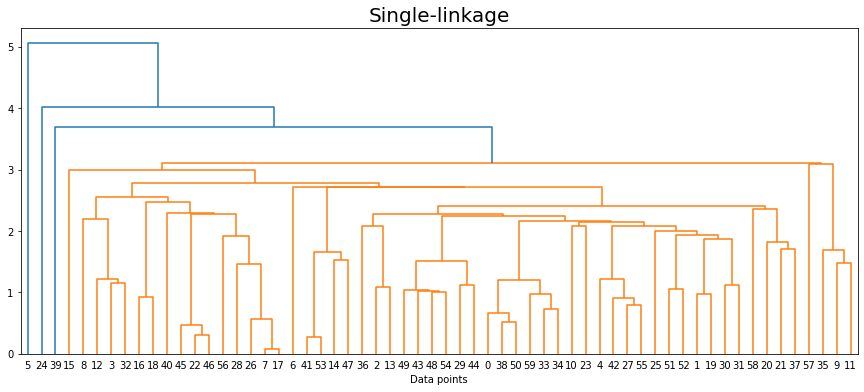

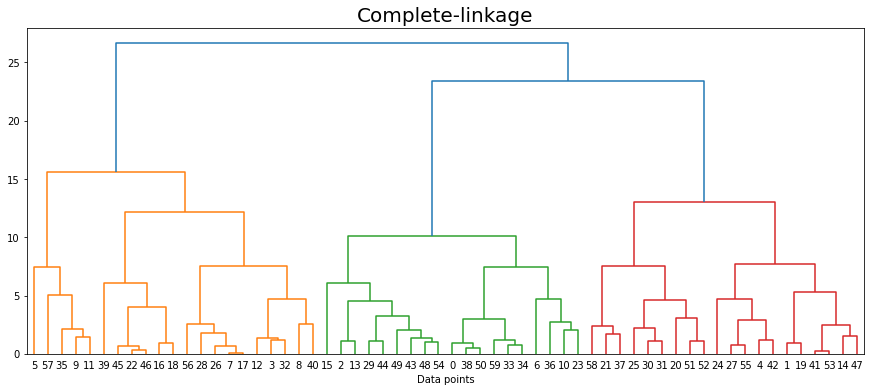

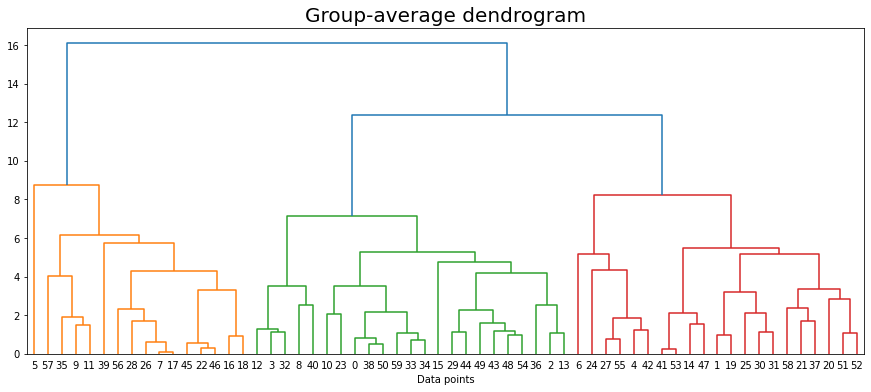

In [12]:
########################### 
# Assignment 6:
#
# Here, you are to use built-in functions in scipy.cluster.hierarchy: 'linkage, dendrogram' to 
# do hierachical clustering.
#
# You need to: a) plot three dendrogram trees achieved by the use of
# three cluster-distance measures in the agglomerative algorithm; (b) report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a), respectively; 
# (c) display 3 clustering results achieved by (a) and (b)
# ===
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

X = np.load('./Data/HC_data.npy')


# a):
# A (?,4) shape matrix Z should returned. At the i-th iteration, 
#   clusters with indices Z[i, 0] and Z[i, 1] are combined 
#   to form cluster . A cluster with an index less than n
#   corresponds to one of the n original observations. 
#   The distance between clusters Z[i, 0] and Z[i, 1] is 
#   given by Z[i, 2]. The fourth value Z[i, 3] represents 
#   the number of original observations in the newly formed cluster.

#   Then, plot the clustering result as a Dendrogram
#       The dendrogram illustrates how each cluster is composed by drawing a U-shaped
#       (or n-shaped) link between a non-singleton cluster and its children. The top of the 
#       U-link indicates a cluster merge. The two legs of the U-link indicate 
#       which clusters were merged. The horizental coordinates of a merge 
#       represents the distance between the two clusters. 
#
#  Your code here
# ###

#Get the length of X data
n = len(X)
#Initial the distance matrix
d_matrix = np.zeros((n,n))
#Calculate the distacne matrix
for i in range(n):
    for j in range(n):
        if i != j:
            #distance of different point
            d_matrix[i][j] = np.sqrt(np.sum(np.square(X[i]-X[j])))
            #The distance matrix
            
print("dmat",d_matrix)

# Use the linkage() function with Single-linkage
distance_single = linkage(X, method = 'single', metric = 'euclidean')

plt.figure(figsize=(15,6))
# plt.axhline(y=21,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_single,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Single-linkage',fontsize=20)
plt.show()

#####################################################

# Use the linkage() function with complete-linkage
distance_complete = linkage(X, method = 'complete', metric = 'euclidean')

plt.figure(figsize=(15,6))
# plt.axhline(y=70,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_complete,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Complete-linkage',fontsize=20)
plt.show()

####################################################

# Use the linkage() function with group-average
distance_average = linkage(X, method = 'average', metric = 'euclidean')

plt.figure(figsize=(15,6))
# plt.axhline(y=50,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_average,
           show_leaf_counts=False,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Group-average dendrogram',fontsize=20)
plt.show()

In [13]:
# (b) Now, report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a)
#
# Fill your answer here:

#Define a Fuction that return the K-cluster and max distance of clusters
# z is output of linkage function
def cluster(z):
    #Calculate the distance between clusters
    c = np.array([np.abs(z[d + 1 ,2] - z[d ,2]) for d in range(z.shape[0]-1)])
    #Calculate the number of clusters found by using the longest K-cluster lifetime
    k = len(z)-np.argmax(c)
    #Get the largest distance
    maxdis = np.max(c)
    return k,maxdis

#report the number of clusters found by using the longest K-cluster lifetime
#K of single-linkage
k1 ,maxdis1 = cluster(distance_single)
#K of complete-linkage
k2 ,maxdis2 = cluster(distance_complete)
#K of group-average
k3 ,maxdis3 = cluster(distance_average)


print(f"\nb)The number of clusters using single-linkage : {k1}")
print(f"  The number of clusters using complete-linkage : {k2}")
print(f"  The number of clusters using group-average : {k3}\n")


b)The number of clusters using single-linkage : 2
  The number of clusters using complete-linkage : 3
  The number of clusters using group-average : 2



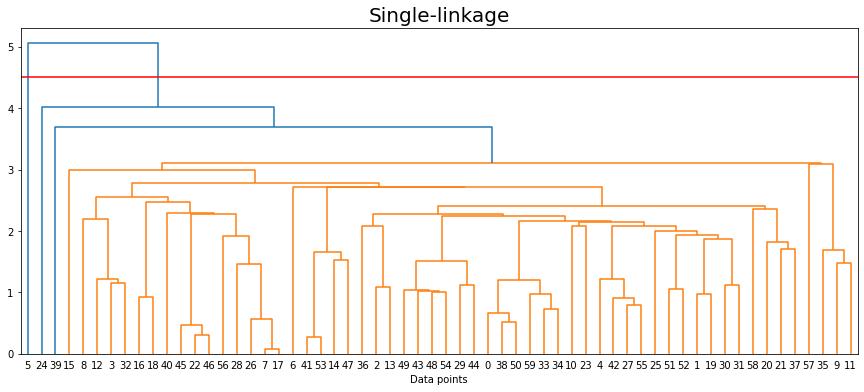

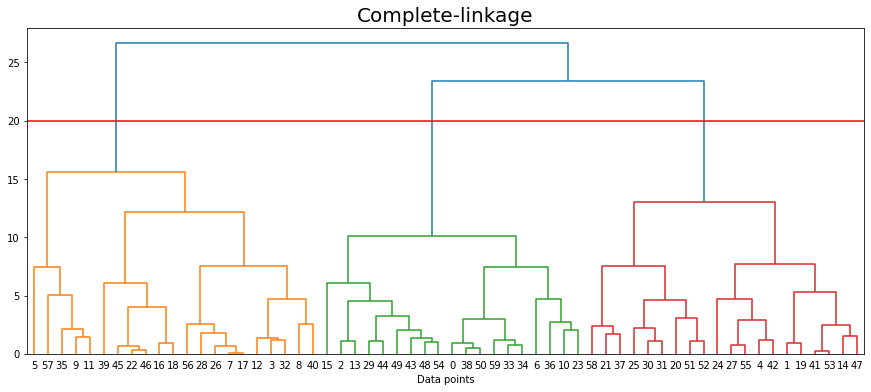

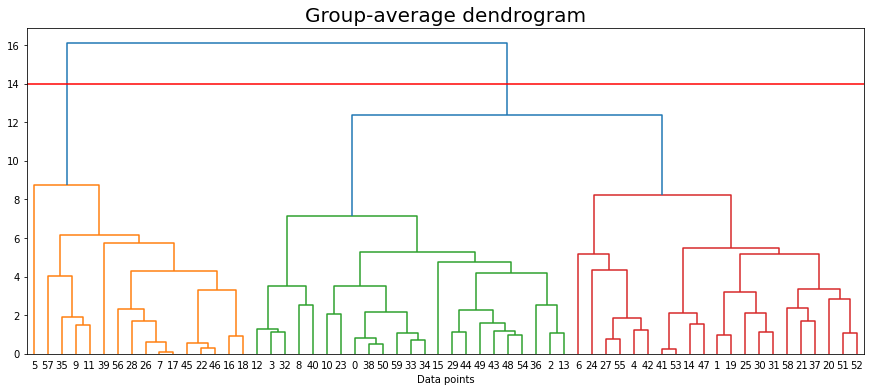

In [14]:
# Use the linkage() function with Single-linkage
distance_single = linkage(X, method = 'single', metric = 'euclidean')

plt.figure(figsize=(15,6))
plt.axhline(y=4.5,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_single,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Single-linkage',fontsize=20)
plt.show()

#####################################################

# Use the linkage() function with complete-linkage
distance_complete = linkage(X, method = 'complete', metric = 'euclidean')

plt.figure(figsize=(15,6))
plt.axhline(y=20,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_complete,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Complete-linkage',fontsize=20)
plt.show()

####################################################

# Use the linkage() function with group-average
distance_average = linkage(X, method = 'average', metric = 'euclidean')

plt.figure(figsize=(15,6))
plt.axhline(y=14,ls="-",c="red")
#Plot the dendrogram
dendrogram(distance_average,
           show_leaf_counts=False,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.xlabel('Data points')
plt.title('Group-average dendrogram',fontsize=20)
plt.show()

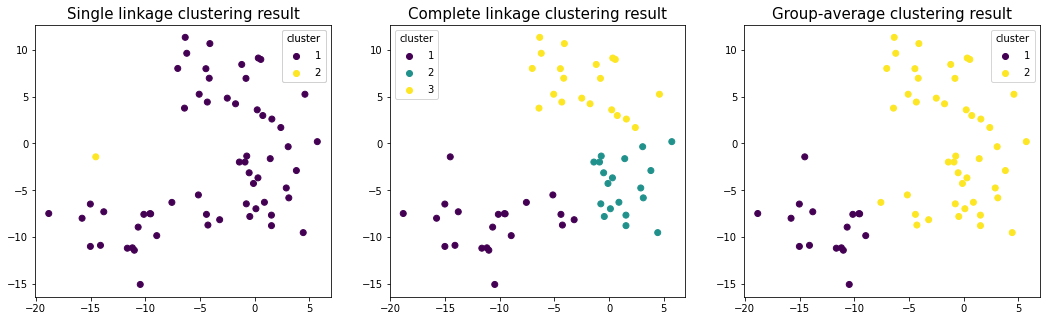

In [15]:
# (c) Display clustering results
# Your code here:

# Assign cluster labels
lb_single = fcluster(distance_single, 2,'maxclust')
# Assign cluster labels
lb_complete = fcluster(distance_complete, 3,'maxclust')
# Assign cluster labels
lb_average = fcluster(distance_average, 2,'maxclust')


fig = plt.figure(figsize=(18,5))
ax=plt.subplot(131)
scatter = ax.scatter(X[:, 0], X[:, 1],c=lb_single)
# get the legends of ax.scatter
legend = ax.legend(*scatter.legend_elements(), title="cluster")
# show the legends
ax.add_artist(legend)
plt.title('Single linkage clustering result',fontsize=15)


ax=plt.subplot(132)
scatter = plt.scatter(X[:,0],X[:,1],c = lb_complete)
# get the legends of ax.scatter
legend = ax.legend(*scatter.legend_elements(), title="cluster")
plt.title('Complete linkage clustering result',fontsize=15)


ax=plt.subplot(133)
scatter = plt.scatter(X[:,0],X[:,1],c = lb_average)
# get the legends of ax.scatter
legend = ax.legend(*scatter.legend_elements(), title="cluster")
plt.title('Group-average clustering result',fontsize=15)

plt.show()

### <span style="color:red">=========== End of Assignment 6 ===========</span>

## Part 4. Ensemble Clustering Analysis

### <span style="color:red">=========== Assignment 7 ===========</span>

In [16]:
########################### 
# Assignment 7:
#
# Here, you are to implement the evidence-accumulated clustering algorithm based on K-means 
# and the agglomerative algorithms in Python.
#
# Hint: To implement the ensemble_clustering function, you can use the
# build-in functions, sklearn.cluster.KMeans , in the scikit-learn library for K-means cluster-
# ing, the scipy.cluster.hierarchy.linkage and scipy.spatial.distance.squareform in the
# scipy library for hierarchical clustering
# ===


# ============
# Compute co-association matrix
# ============
# Let's firstly compute the co-association matrix for ONLY SINGLE cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))

    ###    
    # Your code here
    #
    # To do: finish the computation of co_matrix for single cluster
    ###

    for i in range(n):
        for j in range(n):
            if y[i]==y[j]:
                # y[i] == y[j]，co-matrix value is 1
                co_matrix[i][j]=1
            else:
                # y[i] ！= y[j]，co-matrix value is 0
                co_matrix[i][j]=0
    
    
    ###
    # End of your code
    ###                
    return co_matrix


# Test your implementation
y = np.array([0,1,0,1,0])
y3 = np.array([0,1,1,1,1])

co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp
# It should show a square symmetric matrix, where each element is 0 or 1

array([[1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.]])

In [17]:
# Now compute the co-association matrix for MULTIPLE cluster results
def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    N = len(y_list)
    # Initialize matrix
    n = y_list[0].shape[0]
    co_matrix = np.zeros([n,n],dtype = np.float32)

    ###   
    # Your code here    
    #
    # Hint: Use the 'compute_co_matrix_for_single_cluster(y[0])' you have finished
    #       to compute the co-association matrix for each cluster result,
    #       then add them together. Don't forget to normalize.
    #
    ###

    
    for i in range(N):
        # Calculate the co-matrix for each cluster
        mat = compute_co_matrix_for_single_cluster(y_list[i])
        # Add up all the matrix
        co_matrix += mat
    
    # Normalize the co-matrix
    co_matrix = co_matrix/N
    ###
    # End of your code
    ###
    return co_matrix


# Test your implementation
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
y4 = np.array([1,1,1,1,1])
y5 = np.array([0,1,0,0,0])
co_matrix_tmp = compute_co_matrix([y1,y2])
co_matrix_tmp

array([[1. , 0. , 0.5, 0. , 1. ],
       [0. , 1. , 0.5, 1. , 0. ],
       [0.5, 0.5, 1. , 0.5, 0.5],
       [0. , 1. , 0.5, 1. , 0. ],
       [1. , 0. , 0.5, 0. , 1. ]], dtype=float32)

In [18]:
# ============
# Implement the ensemble clustering given a co_matrix
# ============
import scipy
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensamble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    ###
    # Your code here
    #
    # To do: ensemble the clustering results with Agglomerative Clustering
    # Hint: see 'scipy.cluster.hierarchy.linkage' and 
    #           'scipy.spatial.distance.squareform'
    #
    # Hint2: 'squareform' function requires zero element on diagonal
    ###
    n = len(co_matrix)
    #Calculate the distance matrix
    distance_mat = 1- co_matrix
    #Squareform the matrix
    dis_mat = squareform(distance_mat)
    
    #Get the output through linkage function
    Z = linkage(dis_mat, method = link_type, metric = 'euclidean')
    
    ###
    # End of your code
    ###
    return Z

### <span style="color:red">=========== End of Assignment 7 ===========</span>

### <span style="color:red">=========== Assignment 8 ===========</span>

The initial random centroids are set in the range of all the data point location coordinates.
<br>The partitions is got from Kmeans bulit-in function. The ***k is ranging from 2 to 30***, in order to get a label list of each partiton. All the partitons combine as the input of ensemble_clustering.
<br>The distance of the points in dataset is small, so the ***single link*** is chosen to be the Cluster Distance Metric. 

In [19]:
########################### 
# Assignment 8:
#
# Here, you are to Apply your implemented ensemble_clustering function to two datasets,
# SC_data_2.npy and SC_data_3.npy
#
# You will need to first get a list of clustering results by K-means (you also 
# need to choose the n_clusters), you can use the built in K-means function in sklearn.cluster.
#
# Then you will need to compute the co_matrix with your implemented function, and then
# get and display the clustering result with your implementation. Meanwhile, you need 
# to choose a proper distance measurement (the 'linkage' parameter) to make your algorithm
# work.
#
# ===
np.random.seed(1) # Ensure the results are same on submission
X = np.load('./Data/SC_data_2.npy')
###
# Now apply your ensemble clustering to the first dataset './Data/SC_data_2.npy', display results
#
# Your code here 
###

#Initialize the lbael list
lbs_ensemble= []
for k in range(2, 30):
    # Generate a random array with shape (k, 2)
    # By looking at the maximum and minimum values of the original data, 
    # we can see that the value range can be set between -1. and 2.
    init_inter = np.random.randint(-100,200, size = (k, 2))
    init_center = init_inter/100
    # Use the Kmeans to loop the different k
    kmeans_a8 = KMeans(n_clusters=k, init=init_center, n_init=1).fit(X)
    # Get the centroid
    center_a8 = kmeans_a8.cluster_centers_
    lbs_ensemble.append(partition(X,center_a8))
        
# Calculate the co-matrix
co_matrix = compute_co_matrix(lbs_ensemble)
# Get the result using single linkage as the Cluster Distance Metric
z = ensemble_clustering(co_matrix, 'single')
print(z)



[[0.00000000e+00 9.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.37000000e+02 5.00000000e+02 0.00000000e+00 3.00000000e+00]
 [3.51000000e+02 5.01000000e+02 0.00000000e+00 4.00000000e+00]
 ...
 [9.89000000e+02 9.91000000e+02 2.85714269e-01 2.50000000e+02]
 [9.93000000e+02 9.95000000e+02 3.21428597e-01 2.50000000e+02]
 [9.96000000e+02 9.97000000e+02 7.50000000e-01 5.00000000e+02]]


The optimal partition is : 2


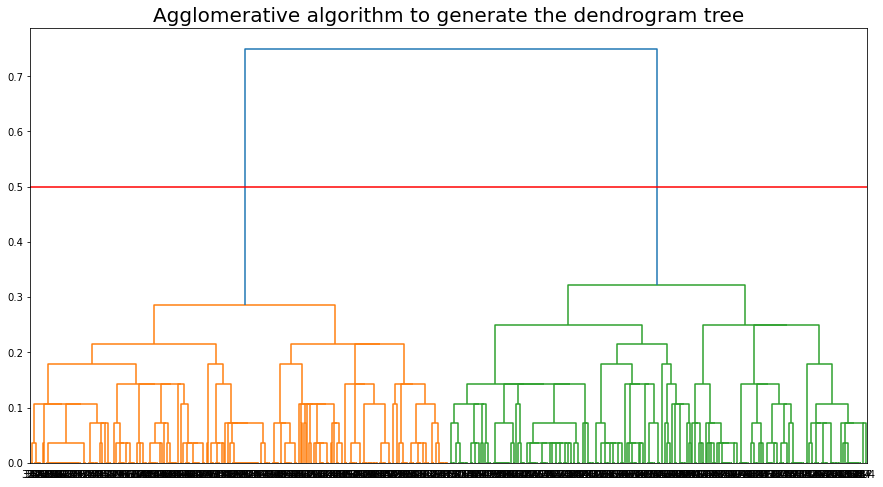

In [20]:
#Apply Agglomerative algorithm to the collective distance matrix to generate the dendrogram tree
plt.figure(figsize=(15,8))
plt.axhline(y=0.5,ls="-",c="red")
k_,_ = cluster(z)
print(f"The optimal partition is : {k_}")
dendrogram(z,
           show_leaf_counts=False,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.title('Agglomerative algorithm to generate the dendrogram tree',fontsize=20)
plt.show()

## The optimal partition : 2

Text(0.5, 1.0, 'Datapoint and clustering result')

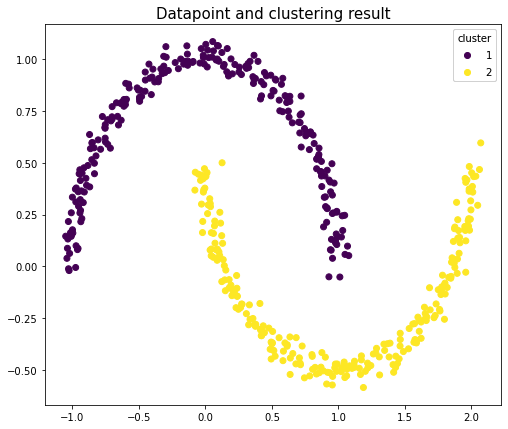

In [21]:
# Get the label of data by ensemble clustering
ib_analysis = fcluster(z, 2,'maxclust')

fig = plt.figure(figsize=(18,7))
ax=plt.subplot(121)
scatter = ax.scatter(X[:, 0], X[:, 1],c=ib_analysis)
# get the legends of ax.scatter
legend = ax.legend(*scatter.legend_elements(), title="cluster")
# show the legends
ax.add_artist(legend)
plt.title('Datapoint and clustering result',fontsize= 15)

In [22]:
X = np.load('./Data/SC_data_3.npy')

np.random.seed(1)
# Now apply your ensemble clustering to the second dataset, './Data/SC_data_3.npy', display results
#
# Your code here 
###

#Initialize the lbael list
lbs_ensemble= []
for k in range(2, 30):
    # Generate a random array with shape (k, 2)
    # By looking at the maximum and minimum values of the original data, 
    # we can see that the value range can be set between -1. and 2.
    init_inter = np.random.randint(-100,200, size = (k, 2))
    init_center = init_inter/100
    # Use the Kmeans to loop the different k
    kmeans_a8 = KMeans(n_clusters=k, init=init_center, n_init=1).fit(X)
    # Get the centroid
    center_a8 = kmeans_a8.cluster_centers_
    lbs_ensemble.append(partition(X,center_a8))
        
# Calculate the co-matrix
co_matrix = compute_co_matrix(lbs_ensemble)
# Get the result using single linkage as the Cluster Distance Metric
z = ensemble_clustering(co_matrix, 'single')
print(z)


[[0.00000000e+00 4.20000000e+01 0.00000000e+00 2.00000000e+00]
 [1.11000000e+02 5.00000000e+02 0.00000000e+00 3.00000000e+00]
 [3.74000000e+02 5.01000000e+02 0.00000000e+00 4.00000000e+00]
 ...
 [9.87000000e+02 9.94000000e+02 3.57142866e-01 1.62000000e+02]
 [9.95000000e+02 9.96000000e+02 3.57142866e-01 2.50000000e+02]
 [9.89000000e+02 9.97000000e+02 4.28571403e-01 5.00000000e+02]]


The optimal partition is : 2


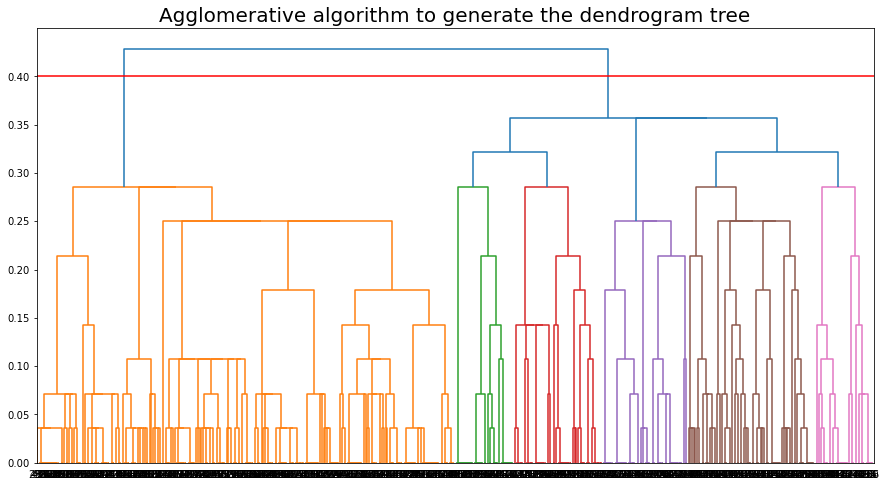

In [23]:
#Apply Agglomerative algorithm to the collective distance matrix to generate the dendrogram tree
plt.figure(figsize=(15,8))
plt.axhline(y=0.4,ls="-",c="red")
k_,_ = cluster(z)
print(f"The optimal partition is : {k_}")
dendrogram(z,
           show_leaf_counts=False,
           leaf_rotation=0,
           leaf_font_size=10,
)
plt.title('Agglomerative algorithm to generate the dendrogram tree',fontsize=20)
plt.show()

## The optimal partition : 2

Text(0.5, 1.0, 'Datapoint and clustering result')

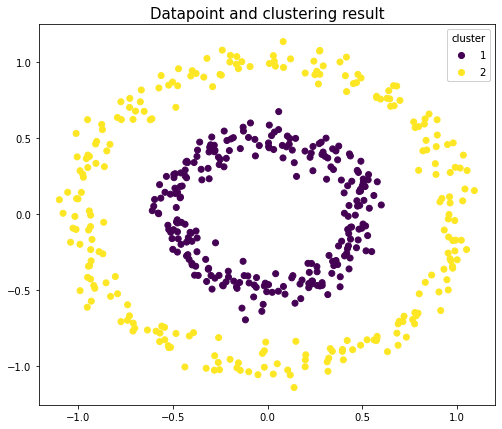

In [24]:
# Get the label of data by ensemble clustering
ib_analysis = fcluster(z, 2,'maxclust')
# ib_analysis = fcluster(z, z[-2][2],'distance')

fig = plt.figure(figsize=(18,7))
ax=plt.subplot(121)
scatter = ax.scatter(X[:, 0], X[:, 1],c=ib_analysis)
# get the legends of ax.scatter
legend = ax.legend(*scatter.legend_elements(), title="cluster")
# show the legends
ax.add_artist(legend)
plt.title('Datapoint and clustering result',fontsize=15)

### <span style="color:red">=========== End of Assignment 8 ===========</span>